In [1]:
import numpy as np
from prettytable import PrettyTable
from time import time
import matplotlib.pyplot as plt
from IPython import display

# Rozwiązywanie układów równań liniowych metodami iteracyjnymi

## Bartosz Kucharz

# Zadany układ

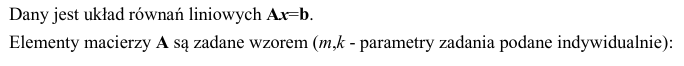

In [2]:
display.Image('rysunek_1.png')

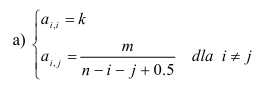

In [24]:
display.Image('rysunek_2.png')

$$ k=8, m=1 $$

In [4]:
k = 8
m = 1

def create_matrix_A(n):
    A = np.dstack(np.indices((n, n), dtype='float64')+1)
    A = np.sum(-A, axis=2)
    A += n + 0.5
    A = m/A
    np.fill_diagonal(A, k)

    return A

def create_x(n, values = [-1, 1]):
    return np.random.choice(values, n)

def get_b(A, x):
    return A@x

# Kryteria stopu

$\left | \left | x^{(i+1)}-x^{(i)} \right | \right |  < \rho$

In [5]:
def stop_x(A, b, x, last_x, rho):
    return norm(x - last_x) < rho

$\left | \left | Ax^{(i)}-b \right | \right |  < \rho$

In [6]:
def stop_Ax(A, b, x, last_x, rho):
    return norm(A@x - b) < rho

# Norma stosowana w obliczeniach
$$\left | \left | x \right | \right |_{\infty}  = \max_{i=1}^{n} \left | x_i \right |$$

In [7]:
def norm(x):
    return np.max(np.abs(x))

In [8]:
def jacobi_method(A, b, stop, rho=1e-10, x=None):
    if x is None:
        x = np.zeros(A.shape[0])
    start_time = time()
    D = np.diag(A)
    R = A - np.diagflat(D)
    last_x = np.empty(x.shape)
    last_x.fill(np.inf)
    iterations = 0
    while not stop(A, b, x, last_x, rho):
        last_x = x
        x = (b - np.dot(R,x)) / D
        iterations+=1
    end_time = time()

        
    return x, np.round((end_time-start_time)*1e3, 3), iterations

In [9]:
def test(ns, rhos, stop1, stop2, initial_x_values):
    table1 = PrettyTable()
    table1.field_names = ['n', 'ρ', 'Liczba iteracji', 'Czas [ms]', 'Norma']
    table2 = PrettyTable()
    table2.field_names = ['n', 'ρ', 'Liczba iteracji', 'Czas [ms]', 'Norma']
    for n in ns:
        A = create_matrix_A(n)
        x = create_x(n)
        b = get_b(A, x)
        init_x = create_x(n, initial_x_values)

        for rho in rhos:
            result_x, time, iterations = jacobi_method(A, b, stop1, rho ,init_x)
            table1.add_row([n, rho, iterations, time, norm(np.abs(x - result_x))])
            
            result_x, time, iterations = jacobi_method(A, b, stop2, rho, init_x)
            table2.add_row([n, rho, iterations, time, norm(np.abs(x - result_x))])
    return table1, table2
            

In [ ]:
ns = [5, 50, 100, 500, 1000, 2000, 5000]
rhos = [1e-2, 1e-5, 1e-9]

# Wyniki

Kolumna "Norma" zawiera wartość normy z różnicy między wektorem zadanym na początku a wektorem wyliczonym metodą Jacobiego.

## Wyniki dla zerowego wektora początkowego

In [ ]:
initial_x_vals = [0]
table1, table2 = test(ns, rhos, stop_x, stop_Ax, initial_x_vals)

### Kryterium stopu $\left | \left | x^{(i+1)}-x^{(i)} \right | \right |  < \rho$

In [ ]:
print(table1)

### Kryterium stopu $\left | \left | Ax^{(i)}-b \right | \right |  < \rho$

In [ ]:
print(table2)

## Wyniki dla wektora początkowego będącego permutacją zbioru {1000, -1000}

In [ ]:
initial_values = [10000, -10000]
table1, table2 = test(ns, rhos, stop_x, stop_Ax, initial_values)

### Kryterium stopu $\left | \left | x^{(i+1)}-x^{(i)} \right | \right |  < \rho$

In [ ]:
print(table1)

### Kryterium stopu $\left | \left | Ax^{(i)}-b \right | \right |  < \rho$

In [ ]:
print(table2)

## Wnioski

Na podstawie powyższych danych można stwierdzić, że liczba iteracji metody nie zależy od rozmiaru rozwiązywanego układu, a jedynie od wartości $\rho$. Czas wykonania rośnie wraz z zmniejszeniem $\rho$ oraz zwiększeniem rozmiaru układu.<br />

Stosując kryterium stopu $\left | \left | Ax^{(i)}-b \right | \right |  < \rho$ metoda ma dłuższy czas wykonania, co może być związane z koniecznością obliczania macierzy $Ax^(i)$ przy każdej iteracji. Jednakże przy zastosowanmiu tego kryterium wartości normy są o rząd wielkości mniejsze w porównaniu do wyników z kryterium $\left | \left | x^{(i+1)}-x^{(i)} \right | \right |  < \rho$.<br />

Wybranie wektora początkowego znacznie oddalonego od wektora wynikowego skutkuje zwiększeniem liczby iteracji i wydłużeniem czasu, nie wpływa jednak na dokładność wyniku.

# Promień spektralny

Promień spektralny jest wyliczany przy pomocy funkcji z biblioteki numpy (numpy.linalg.eigvals), która zwraca tablice wartości własnych dla zadanej macierzy. Mając wartości własne promień spektralny jest wyliczany ze wzoru: $\rho(M) = \max_{i=1}^{n}{|\lambda_i|}$ gdzie M-macierz iteracji, $\lambda$-wartość własna.

In [ ]:
def spectral_radii(ns):
    table = PrettyTable()
    table.field_names = ['n', 'Promień spektralny']
    for n in ns:
        A = create_matrix_A(n)
        D = np.zeros(A.shape)
        np.fill_diagonal(D, np.diag(A))
        M = np.eye(A.shape[0]) - np.linalg.inv(D)@A
        table.add_row([n, np.max(np.abs(np.linalg.eigvals(M)))])
    return table

In [ ]:
table = spectral_radii(ns)

In [ ]:
print(table)

Wszystkie obliczone wartości promieni spektralnych są mniejsze od 1. Oznacza to, że dla danych rozmiarów macierzy metoda rozwiązywania układu równań jest zbieżna bez względu na wybór wektora początkowego. Zgadza się to z przeprowadzonymi obliczeniami.

In [17]:
def spectral_radii(ns):
    table = PrettyTable()
    table.field_names = ['n', 'Promień spektralny']
    for n in ns:
        A = create_matrix_A(n)
        D = np.zeros(A.shape)
        np.fill_diagonal(D, np.diag(A))
        M = np.eye(A.shape[0]) - np.linalg.inv(D)@A
        table.add_row([n, np.max(np.abs(np.linalg.eigvals(M)))])
    return table

In [18]:
table = spectral_radii(ns)

In [19]:
print(table)

+------+--------------------+
|  n   | Promień spektralny |
+------+--------------------+
|  5   | 0.4088762274491867 |
|  50  | 0.4163044986583178 |
| 100  | 0.4166615319528021 |
| 500  | 0.416948184556922  |
| 1000 | 0.4169838483178467 |
| 2000 | 0.4170016586467134 |
| 5000 | 0.4170123421211433 |
+------+--------------------+


Wszystkie obliczone wartości promieni spektralnych są mniejsze od 1. Oznacza to, że dla danych rozmiarów macierzy metoda rozwiązywania układu równań jest zbieżna bez względu na wybór wektora początkowego. Zgadza się to z przeprowadzonymi obliczeniami.